In [213]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import six
sns.set(style="whitegrid", font_scale=1.3)
sns.set(rc={'figure.figsize':(15.7,7.27)})

In [84]:
results = dict()
# To load data from json
with open('./experiment_results/ofs_results.json', 'r') as fp:
    results['OFS'] = json.load(fp)
with open('./experiment_results/fsds_results.json', 'r') as fp:
    results['FSDS'] = json.load(fp)
with open('./experiment_results/mcnn_results.json', 'r') as fp:
    results['MCNN'] = json.load(fp)
with open('./experiment_results/canc_results.json', 'r') as fp:
    results['CancelOut'] = json.load(fp)

# Tables

Time: Averaged over all differen no. of selected features

In [85]:
time_table = pd.DataFrame()

for alg in results:
    
    b50_avg_har_t = 0
    b100_avg_har_t = 0
    b200_avg_har_t = 0
    b50_avg_credit_t = 0
    b100_avg_credit_t = 0
    b200_avg_credit_t = 0
    b50_avg_usenet_t = 0
    b100_avg_usenet_t = 0
    b200_avg_usenet_t = 0
    
    for i in results[alg]:        
    
        if 'har' in i:
            if '50B' in i:
                b50_avg_har_t += results[alg][i]['time_avg']
            elif '100B' in i:
                b100_avg_har_t += results[alg][i]['time_avg']
            elif '200B' in i:
                b200_avg_har_t += results[alg][i]['time_avg'] 
        elif 'credit' in i:
            if '50B' in i:
                b50_avg_credit_t += results[alg][i]['time_avg']
            elif '100B' in i:
                b100_avg_credit_t += results[alg][i]['time_avg']
            elif '200B' in i:
                b200_avg_credit_t += results[alg][i]['time_avg']
        if 'usenet' in i:
            if '50B' in i:
                b50_avg_usenet_t += results[alg][i]['time_avg']
            elif '100B' in i:
                b100_avg_usenet_t += results[alg][i]['time_avg']
            elif '200B' in i:
                b200_avg_usenet_t += results[alg][i]['time_avg']
    
    time_table.loc[alg,'HAR B50'] = round(b50_avg_har_t / 3, 2)
    time_table.loc[alg,'HAR B100'] = round(b100_avg_har_t / 3, 2)
    time_table.loc[alg,'HAR B200'] = round(b200_avg_har_t / 3, 2)
    time_table.loc[alg,'Credit B50'] = round(b50_avg_credit_t / 3, 2)
    time_table.loc[alg,'Credit B100'] = round(b100_avg_credit_t / 3, 2)
    time_table.loc[alg,'Credit B200'] = round(b200_avg_credit_t / 3, 2)
    time_table.loc[alg,'Usenet B50'] = round(b50_avg_usenet_t / 3, 2)
    time_table.loc[alg,'Usenet B100'] = round(b100_avg_usenet_t / 3, 2)
    time_table.loc[alg,'Usenet B200'] = round(b200_avg_usenet_t / 3, 2)

In [208]:
time_table

,HAR B50,HAR B100,HAR B200,Credit B50,Credit B100,Credit B200,Usenet B50,Usenet B100,Usenet B200
OFS,79.34,154.08,309.50,7.01,13.45,27.40,124.04,245.71,496.39
FSDS,31.45,73.70,141.59,0.78,0.81,0.99,30.21,71.31,129.72
MCNN,13409.15,22551.96,45277.86,34.83,57.96,102.23,1315.58,2609.60,5334.33
CancelOut,0.00,0.00,0.00,2071.26,2693.03,3285.02,0.00,0.00,0.00


In [235]:
def render_mpl_table(data, col_width=2.0, row_height=0.625, font_size=14,
                     header_color='#2c2c2c', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

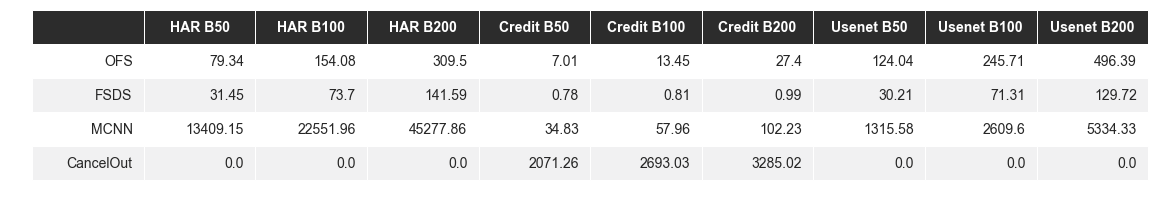

In [236]:
# Plot time table and save to image
df = time_table.reset_index() 
df.rename(index=str, columns={'index': ''}, inplace=True)
render_mpl_table(df, header_columns=0, col_width=2.0)

plt.savefig('./experiment_results/figures/time_measures')

Accuracy & FCR: averaged over all different batch sizes

In [92]:
acc_table = pd.DataFrame()
fscr_table = pd.DataFrame()

for alg in results:

    f5_avg_har_a = 0
    f10_avg_har_a = 0
    f20_avg_har_a = 0
    f5_avg_credit_a = 0
    f10_avg_credit_a = 0
    f20_avg_credit_a = 0
    f5_avg_usenet_a = 0
    f10_avg_usenet_a = 0
    f20_avg_usenet_a = 0
    
    f5_avg_har_f = 0
    f10_avg_har_f = 0
    f20_avg_har_f = 0
    f5_avg_credit_f = 0
    f10_avg_credit_f = 0
    f20_avg_credit_f = 0
    f5_avg_usenet_f = 0
    f10_avg_usenet_f = 0
    f20_avg_usenet_f = 0
    
    for i in results[alg]:        
    
        if 'har' in i:
            if '5F' in i:
                f5_avg_har_a += results[alg][i]['acc_avg']
                f5_avg_har_f += results[alg][i]['fscr_avg']
            elif '10F' in i:
                f10_avg_har_a += results[alg][i]['acc_avg']
                f10_avg_har_f += results[alg][i]['fscr_avg']
            elif '20F' in i:
                f20_avg_har_a += results[alg][i]['acc_avg']
                f20_avg_har_f += results[alg][i]['fscr_avg']
        elif 'credit' in i:
            if '5F' in i:
                f5_avg_credit_a += results[alg][i]['acc_avg']
                f5_avg_credit_f += results[alg][i]['fscr_avg']
            elif '10F' in i:
                f10_avg_credit_a += results[alg][i]['acc_avg']
                f10_avg_credit_f += results[alg][i]['fscr_avg']
            elif '20F' in i:
                f20_avg_credit_a += results[alg][i]['acc_avg']
                f20_avg_credit_f += results[alg][i]['fscr_avg']
        if 'usenet' in i:
            if '5F' in i:
                f5_avg_usenet_a += results[alg][i]['acc_avg']
                f5_avg_usenet_f += results[alg][i]['fscr_avg']                
            elif '10F' in i:
                f10_avg_usenet_a += results[alg][i]['acc_avg']
                f10_avg_usenet_f += results[alg][i]['fscr_avg']
            elif '20F' in i:
                f20_avg_usenet_a += results[alg][i]['acc_avg']
                f20_avg_usenet_f += results[alg][i]['fscr_avg']
    
    acc_table.loc[alg,'HAR F5'] = round(f5_avg_har_a / 3, 2)
    acc_table.loc[alg,'HAR F10'] = round(f10_avg_har_a / 3, 2)
    acc_table.loc[alg,'HAR F20'] = round(f20_avg_har_a / 3, 2)
    acc_table.loc[alg,'Credit F5'] = round(f5_avg_credit_a / 3, 2)
    acc_table.loc[alg,'Credit F10'] = round(f10_avg_credit_a / 3, 2)
    acc_table.loc[alg,'Credit F20'] = round(f20_avg_credit_a / 3, 2)
    acc_table.loc[alg,'Usenet F5'] = round(f5_avg_usenet_a / 3, 2)
    acc_table.loc[alg,'Usenet F10'] = round(f10_avg_usenet_a / 3, 2)
    acc_table.loc[alg,'Usenet F20'] = round(f20_avg_usenet_a / 3, 2)
    
    fscr_table.loc[alg,'HAR F5'] = round(f5_avg_har_f / 3, 2)
    fscr_table.loc[alg,'HAR F10'] = round(f10_avg_har_f / 3, 2)
    fscr_table.loc[alg,'HAR F20'] = round(f20_avg_har_f / 3, 2)
    fscr_table.loc[alg,'Credit F5'] = round(f5_avg_credit_f / 3, 2)
    fscr_table.loc[alg,'Credit F10'] = round(f10_avg_credit_f / 3, 2)
    fscr_table.loc[alg,'Credit F20'] = round(f20_avg_credit_f / 3, 2)
    fscr_table.loc[alg,'Usenet F5'] = round(f5_avg_usenet_f / 3, 2)
    fscr_table.loc[alg,'Usenet F10'] = round(f10_avg_usenet_f / 3, 2)
    fscr_table.loc[alg,'Usenet F20'] = round(f20_avg_usenet_f / 3, 2)

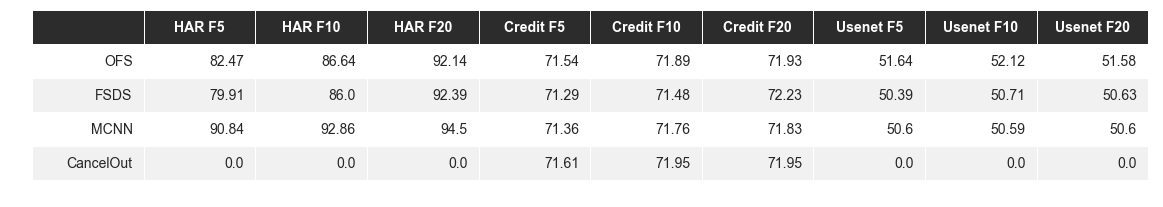

In [237]:
# Plot time table and save to image
df = acc_table.reset_index() 
df.rename(index=str, columns={'index': ''}, inplace=True)
render_mpl_table(df, header_columns=0, col_width=2.0)

plt.savefig('./experiment_results/figures/acc_measures')

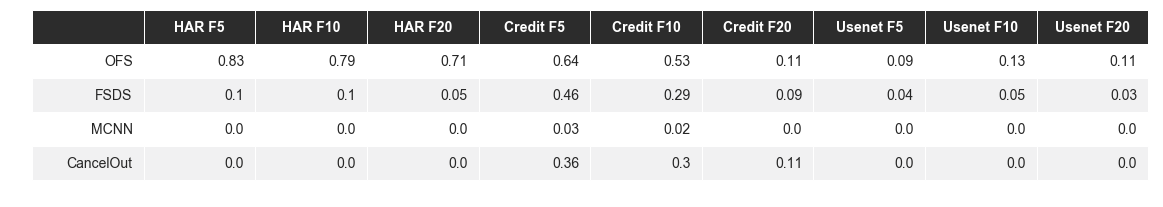

In [238]:
# Plot time table and save to image
df = fscr_table.reset_index() 
df.rename(index=str, columns={'index': ''}, inplace=True)
render_mpl_table(df, header_columns=0, col_width=2.0)

plt.savefig('./experiment_results/figures/fscr_measures')

# Plots

## Accuracy

In [197]:
avg_acc_measures =dict()
batch_size = '50B'

for alg in results:
    avg_acc_har = np.array([])
    avg_acc_credit = np.array([])
    avg_acc_usenet = np.array([])
    
    
    for key, val in results[alg].items():
        if 'har' in key and batch_size in key:
            acc = np.array(val['acc_measures'])
            
            if len(avg_acc_har) == 0:
                avg_acc_har = acc
            else:
                avg_acc_har += acc
                
        if 'credit' in key and batch_size in key:
            acc = np.array(val['acc_measures'])
            
            if len(avg_acc_credit) == 0:
                avg_acc_credit = acc
            else:
                avg_acc_credit += acc
                
        if 'usenet' in key and batch_size in key:
            acc = np.array(val['acc_measures'])
            
            if len(avg_acc_usenet) == 0:
                avg_acc_usenet = acc
            else:
                avg_acc_usenet += acc
                
    avg_acc_measures[alg+';har;'+batch_size] = avg_acc_har / 3
    avg_acc_measures[alg+';credit;'+batch_size] = avg_acc_credit / 3
    avg_acc_measures[alg+';usenet;'+batch_size] = avg_acc_usenet / 3

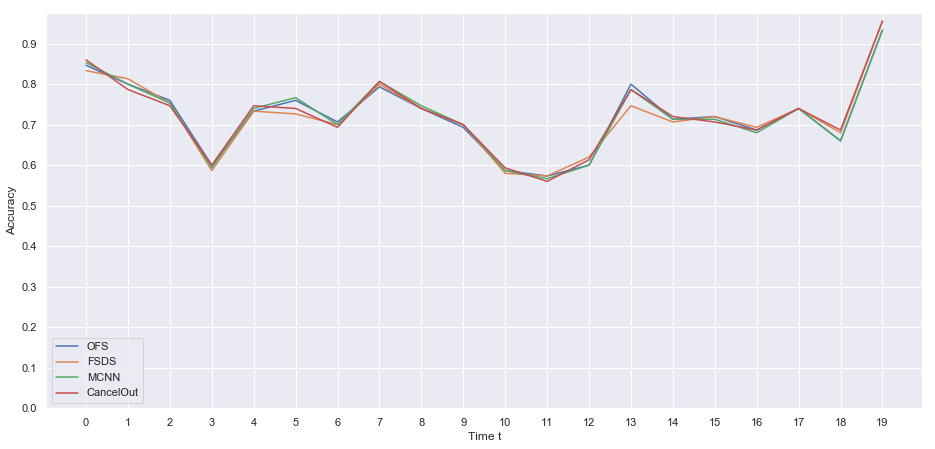

In [198]:
# Avg. Accuracy for Credit data with given batch size
for alg in results:
    plt.plot(avg_acc_measures[alg+';credit;'+batch_size], label=alg)

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, len(avg_acc_measures[alg+';credit;'+batch_size]), 1))
plt.ylabel('Accuracy')
plt.xlabel('Time t')
plt.legend(loc='best')

plt.savefig('./experiment_results/figures/acc_credit_'+batch_size)

## FSCR

In [199]:
avg_fscr_measures =dict()
batch_size = '50B'

for alg in results:
    avg_fscr_har = np.array([])
    avg_fscr_credit = np.array([])
    avg_fscr_usenet = np.array([])
    
    
    for key, val in results[alg].items():
        if 'har' in key and batch_size in key:
            fscr = np.array(val['fscr_measures'])
            
            if len(avg_fscr_har) == 0:
                avg_fscr_har = fscr
            else:
                avg_fscr_har += fscr
                
        if 'credit' in key and batch_size in key:
            fscr = np.array(val['fscr_measures'])
            
            if len(avg_fscr_credit) == 0:
                avg_fscr_credit = fscr
            else:
                avg_fscr_credit += fscr
                
        if 'usenet' in key and batch_size in key:
            acc = np.array(val['fscr_measures'])
            
            if len(avg_fscr_usenet) == 0:
                avg_fscr_usenet = fscr
            else:
                avg_fscr_usenet += fscr
                
    avg_fscr_measures[alg+';har;'+batch_size] = avg_fscr_har / 3
    avg_fscr_measures[alg+';credit;'+batch_size] = avg_fscr_credit / 3
    avg_fscr_measures[alg+';usenet;'+batch_size] = avg_fscr_usenet / 3

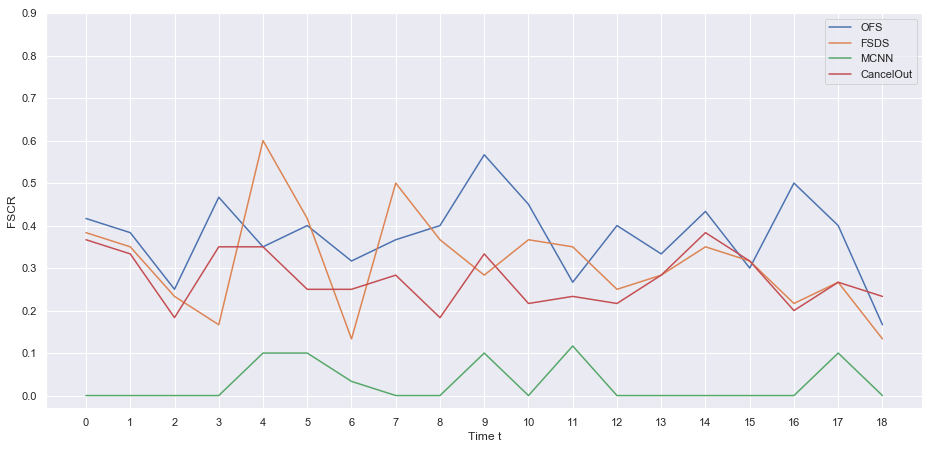

In [200]:
# Avg. Feature Selection Change Rate for Credit data with given batch size
for alg in results:
    plt.plot(avg_fscr_measures[alg+';credit;'+batch_size], label=alg)

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, len(avg_fscr_measures[alg+';credit;'+batch_size]), 1))
plt.ylabel('FSCR')
plt.xlabel('Time t')
plt.legend(loc='best')

plt.savefig('./experiment_results/figures/fscr_credit_'+batch_size)